In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:

df=pd.read_csv('Train.csv', index_col=0)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [16]:
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [17]:
#univariate
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [18]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [ ]:
grouped = df.groupby("Reached.on.Time_Y.N")["Mode_of_Shipment"].value_counts()

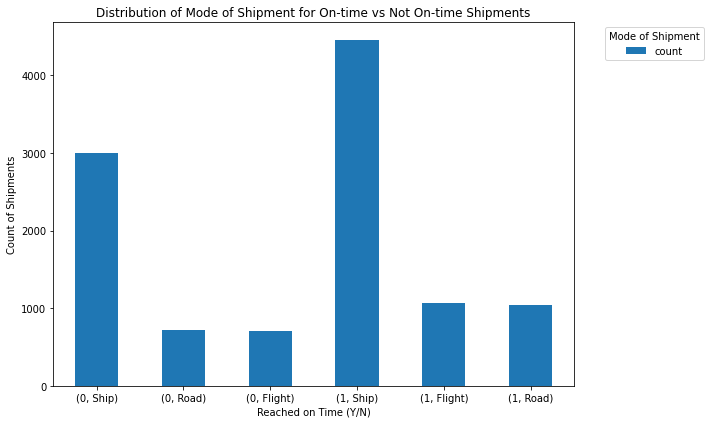

In [24]:
# Grouped bar plot
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adding labels and title
plt.title('Distribution of Mode of Shipment for On-time vs Not On-time Shipments')
plt.xlabel('Reached on Time (Y/N)')
plt.ylabel('Count of Shipments')
plt.xticks(rotation=0)  # Keeps x-axis labels horizontal for better readability
plt.legend(title='Mode of Shipment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='Product_importance'>

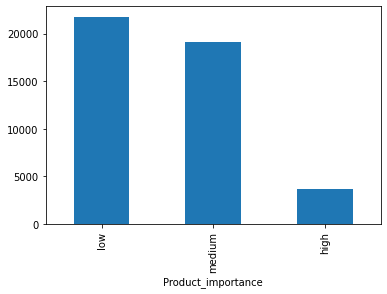

In [27]:
df.groupby("Product_importance")["Customer_care_calls"].sum().sort_values(ascending=False).plot(kind='bar')

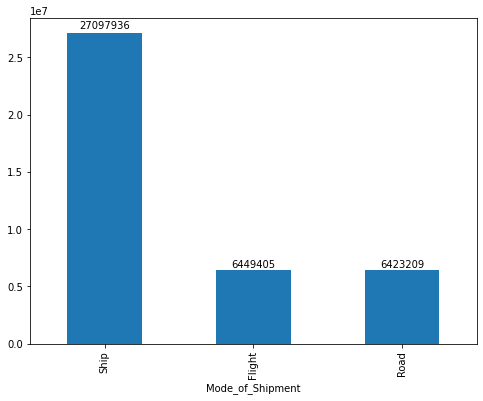

In [31]:
weight_by_mode = df.groupby("Mode_of_Shipment")["Weight_in_gms"].sum().sort_values(ascending=False)

ax = weight_by_mode.plot(kind='bar', figsize=(8,6))

# Add sum values on each bar
for i, value in enumerate(weight_by_mode):
    # Add the sum value to each bar
    ax.text(i, value + (value * 0.01), f'{int(value)}', ha='center', va='bottom', fontsize=10)


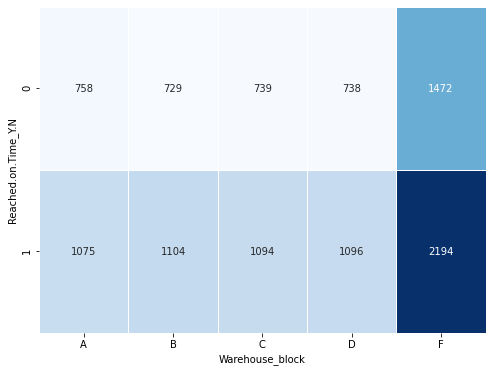

In [45]:
crosstabbed = pd.crosstab(df["Reached.on.Time_Y.N"],df["Warehouse_block"])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstabbed, annot=True, cmap="Blues", fmt="d", cbar=False, linewidths=0.5);


<Axes: >

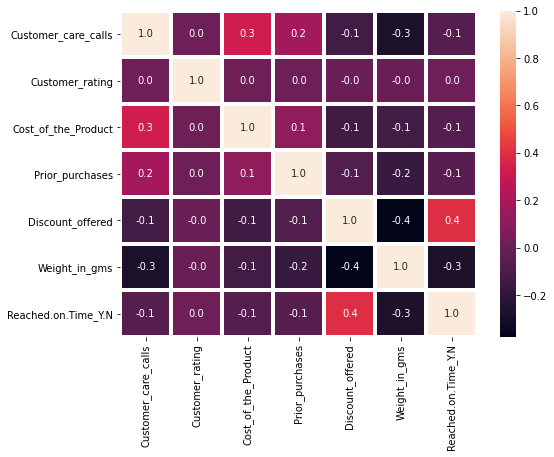

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
df_numeric = df.select_dtypes(include='number')

sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f", linewidths=4, ax=ax)

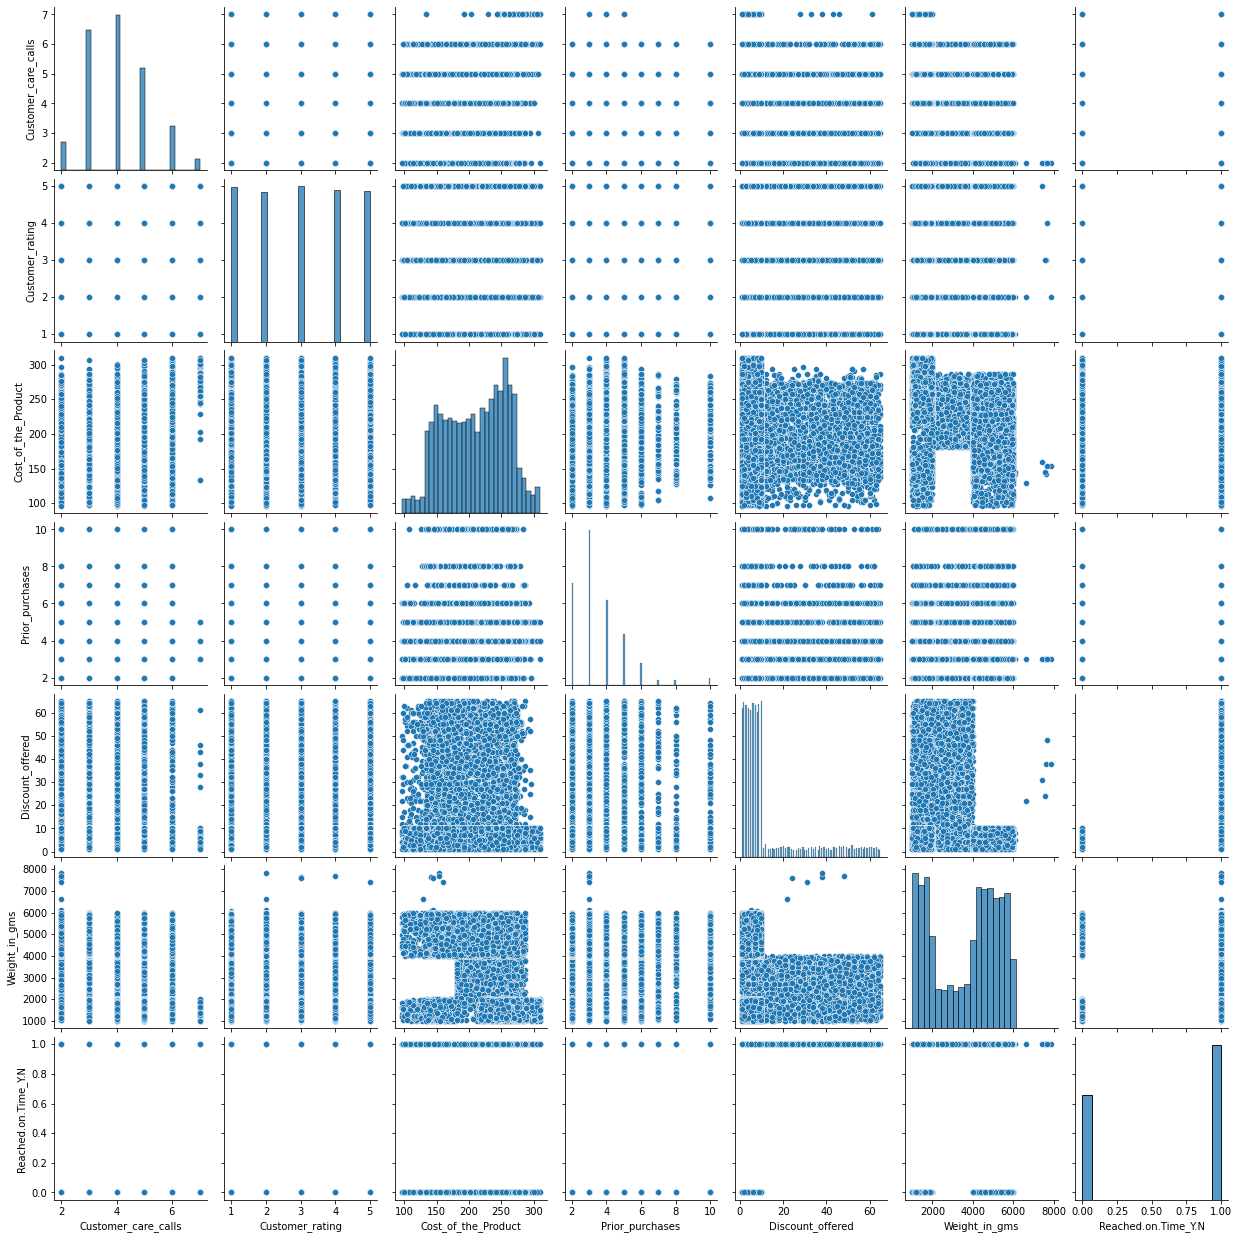

In [44]:
sns.pairplot(data=df, kind='scatter');